### Team Game Of Analytics - Ayushi Choudhary, Ritumbhra Sagar, Shilpa Chotwani, Sonal Agarwal

In [1]:
#import modules
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime as dtm 
from datetime import date
import numpy as np

import sklearn as sk
import sklearn.tree as tree
from IPython.display import Image  
import pydotplus

import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [2]:
# Loading Dataset
data = pd.read_csv("CSVDurData1_Final.csv")

In [3]:
# Checking unique rows
filter_data=data[['Transaction_NBR','Household_ID']].drop_duplicates()
len(filter_data)

173262

### Summary

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Household_ID,173262.0,1.292614e+08,1.714242e+07,1.000035e+08,1.141345e+08,1.293859e+08,1.444470e+08,1.707645e+08
Transaction_NBR,173262.0,1.267407e+01,1.779025e+01,1.000000e+00,3.000000e+00,7.000000e+00,1.500000e+01,2.550000e+02
Transaction_Total,173262.0,2.434814e+01,2.831114e+01,1.000000e+00,8.000000e+00,1.500000e+01,3.000000e+01,2.550000e+02
Transaction_Location,173262.0,2.544546e+03,1.353074e+03,2.000000e+00,8.600000e+02,3.202000e+03,3.611000e+03,4.510000e+03
Online_Transaction,173262.0,1.471760e-02,1.204204e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
ORIGINAL_TICKET_NBR,173262.0,2.544820e+11,1.353241e+11,2.001612e+08,8.600255e+10,3.200000e+11,3.610000e+11,4.510000e+11
Transaction_type,173262.0,1.335267e+00,7.651849e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.000000e+00
PRODUCT_ID,132099.0,7.171141e+05,1.238596e+05,5.326560e+05,5.810970e+05,7.403130e+05,8.102720e+05,1.068840e+06
Sub_Category_NBR,173262.0,3.164813e+02,1.953734e+02,0.000000e+00,1.720000e+02,3.190000e+02,3.790000e+02,9.810000e+02
Quantity,173262.0,8.219113e-01,1.380541e+00,-1.100000e+01,1.000000e+00,1.000000e+00,1.000000e+00,9.900000e+01


### CLEANING DATA

#### Dropping Columns that are not required

In [6]:
#Creating a column Total Children that counts the number of children in a household
data['TotalChildren']=data.MALE_CHID_AGE_0_2+data.MALE_CHID_AGE_3_5+data.MALE_CHID_AGE_6_10+data.MALE_CHID_AGE_11_15+\
                 data.MALE_CHID_AGE_16_17+data.FEMALE_CHID_AGE_0_2+data.FEMALE_CHID_AGE_3_5+data.FEMALE_CHID_AGE_6_10+\
                 data.FEMALE_CHID_AGE_11_15+data.FEMALE_CHID_AGE_16_17+data.UNKNOWN_CHID_AGE_0_2+\
                 data.UNKNOWN_CHID_AGE_3_5+data.UNKNOWN_CHID_AGE_6_10+data.UNKNOWN_CHID_AGE_11_15+data.UNKNOWN_CHID_AGE_16_17

#### Removing or Replacing Nan values

In [7]:
data.isna().sum().T

Household_ID                        0
Transaction_NBR                     0
Transaction_Total                   0
Transaction_Date                    0
Transaction_Location                0
Online_Transaction                  0
ORIGINAL_TICKET_NBR                 0
Transaction_type                    0
PRODUCT_ID                      41163
Category_Description              517
Sub_Category_NBR                    0
Sub_Category_Description         3847
Transaction_Type_Description       36
Quantity                            0
UNIT_PRICE                          0
EXTENDED_PRICE                      0
RETURN_IND                      13411
Return_Location_If_Any              0
Age_HH                          20971
CHILDERN_PRESENCE               91777
Income                          20455
GENDERHH                            0
Gender_Individual               14575
MALE_CHID_AGE_0_2                   0
MALE_CHID_AGE_3_5                   0
MALE_CHID_AGE_6_10                  0
MALE_CHID_AG

In [8]:
data2=data.copy()

In [9]:
#Removing Category Description with Nan values since only 517 rows
data3=data2[~(data2.Category_Description.isna())]

In [10]:
#Replacing AgeHH with mean where there are Nan
data3.loc[data3.Age_HH.isna(),'Age_HH']=data3.Age_HH.mean()

In [11]:
#Replacing IncomeTRANSACTION_TYPE DESCRIPTION  with mean where there are Nan
data3.loc[data3.Income.isna(),'Income']=data3.Income.mean()

#### Formatting Variables

In [12]:
# Extracting date from timestamp
data3['Formatted_Date']=data3['Transaction_Date'].str.replace(':00:00:00','')

In [13]:
data3['Final_Date']=pd.to_datetime(data3['Formatted_Date'])

In [14]:
#Creating Month Variable
data3['Month']=data3['Final_Date'].astype(np.datetime64).dt.month

In [15]:
#Creating Year Variable
data3['Year']=data3['Final_Date'].astype(np.datetime64).dt.year

### Q1 - Predicting whether a customer will return the product ?

In [16]:
data4=data3[(data3.GENDERHH=='M')|(data3.GENDERHH=='F')]

In [17]:
#Dropping the Id, Description Variables and all Child Dummies(combined into TotalChildren)
data5=data4.drop(columns=['PRODUCT_ID','Sub_Category_NBR','Sub_Category_Description',\
                         'CHILDERN_PRESENCE','Gender_Individual','Transaction_Type_Description',\
                         'Household_ID','Transaction_NBR','Transaction_Total','Transaction_Location',\
                         'ORIGINAL_TICKET_NBR','Transaction_Type_Description','Quantity',\
                         'EXTENDED_PRICE','Return_Location_If_Any','MALE_CHID_AGE_0_2', 'MALE_CHID_AGE_3_5',\
                         'MALE_CHID_AGE_6_10','MALE_CHID_AGE_11_15', 'MALE_CHID_AGE_16_17','FEMALE_CHID_AGE_0_2',\
                         'FEMALE_CHID_AGE_3_5', 'FEMALE_CHID_AGE_6_10','FEMALE_CHID_AGE_11_15',\
                         'FEMALE_CHID_AGE_16_17', 'UNKNOWN_CHID_AGE_0_2','UNKNOWN_CHID_AGE_3_5',\
                         'UNKNOWN_CHID_AGE_6_10', 'UNKNOWN_CHID_AGE_11_15','UNKNOWN_CHID_AGE_16_17'])

In [18]:
data5.describe()

,Online_Transaction,Transaction_type,UNIT_PRICE,Age_HH,Income,TotalChildren,Month,Year
count,145032.000000,145032.000000,145032.000000,145032.000000,145032.000000,145032.000000,145032.000000,145032.000000
mean,0.013680,1.335547,108.908803,48.629028,5.970029,0.501358,6.092428,2001.627558
std,0.116158,0.766242,292.713003,13.547555,2.149895,0.875356,4.073617,1.519071
min,0.000000,1.000000,-6899.980000,18.000000,1.000000,0.000000,1.000000,1998.000000
25%,0.000000,1.000000,10.000000,40.000000,5.000000,0.000000,2.000000,2001.000000
50%,0.000000,1.000000,39.990000,48.261417,6.000000,0.000000,6.000000,2002.000000
75%,0.000000,1.000000,129.990000,56.000000,7.000000,1.000000,10.000000,2003.000000
max,1.000000,6.000000,6999.990000,99.000000,9.000000,6.000000,12.000000,2004.000000


In [19]:
dfr=data5.copy()

In [20]:
dfr.groupby('Transaction_type').size()

Transaction_type
1    116916
2     12126
3     12704
4      2040
5      1219
6        27
dtype: int64

In [21]:
#Considering only Transaction_Type=1 since it has maximum transactions
dfr1=dfr[(dfr.Transaction_type==1)]

#### Exploring the Returns Data

In [22]:
#Removing not null return indicators since we need to know if product was returned or not
dfr2=dfr1[~dfr1.RETURN_IND.isna()]

In [23]:
#Creating Binary Return Variable
dfr2['Bin_Return']=(dfr2.RETURN_IND=='Y')*1

In [24]:
dfr2.groupby('Bin_Return').size()

Bin_Return
0    95902
1    10729
dtype: int64

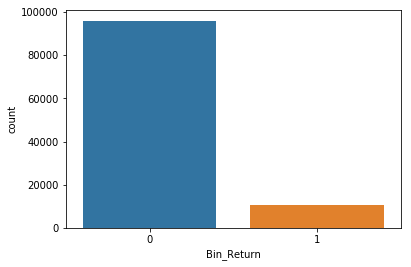

In [25]:
sns.countplot(x='Bin_Return',data=dfr2)

In [26]:
dfr2.groupby('Bin_Return').mean().T

Bin_Return,0,1
Online_Transaction,0.012252,0.007177
Transaction_type,1.000000,1.000000
UNIT_PRICE,156.927153,172.406600
Age_HH,48.612543,48.465753
Income,6.003069,5.998745
TotalChildren,0.504421,0.519340
Month,6.128277,6.498649
Year,2001.681821,2001.495946


Text(0.5, 1.0, 'Returns for Category')

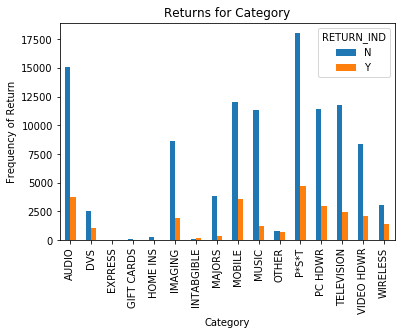

In [27]:
pd.crosstab(data4.Category_Description,data4.RETURN_IND).plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Frequency of Return')
plt.title('Returns for Category')

Text(0.5, 1.0, 'Returns for Month')

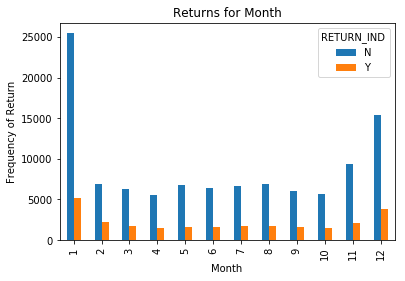

In [28]:
pd.crosstab(data4.Month,data4.RETURN_IND).plot(kind='bar')
plt.xlabel('Month')
plt.ylabel('Frequency of Return')
plt.title('Returns for Month')

In [29]:
dfr2.describe().T

,count,mean,std,min,25%,50%,75%,max
Online_Transaction,106631.0,0.011741,0.107720,0.00,0.00,0.000000,0.00,1.00
Transaction_type,106631.0,1.000000,0.000000,1.00,1.00,1.000000,1.00,1.00
UNIT_PRICE,106631.0,158.484664,296.066554,-599.99,19.99,59.990000,169.99,6999.99
Age_HH,106631.0,48.597773,13.419048,18.00,40.00,48.261417,56.00,99.00
Income,106631.0,6.002634,2.140006,1.00,5.00,6.000000,7.00,9.00
TotalChildren,106631.0,0.505922,0.876111,0.00,0.00,0.000000,1.00,6.00
Month,106631.0,6.165543,4.099826,1.00,2.00,6.000000,10.00,12.00
Year,106631.0,2001.663119,1.524222,1998.00,2001.00,2002.000000,2003.00,2004.00
Bin_Return,106631.0,0.100618,0.300824,0.00,0.00,0.000000,0.00,1.00


### Logistic Regression for Q1 - Predicting whether a customer will return the product ?

In [30]:
dfr3=pd.get_dummies(dfr2,columns=['Category_Description','GENDERHH',\
                                  'Month','Year'],drop_first=True)

In [31]:
dfr3.columns

Index(['Transaction_Date', 'Online_Transaction', 'Transaction_type',
       'UNIT_PRICE', 'RETURN_IND', 'Age_HH', 'Income', 'TotalChildren',
       'Formatted_Date', 'Final_Date', 'Bin_Return',
       'Category_Description_DVS', 'Category_Description_EXPRESS',
       'Category_Description_GIFT CARDS', 'Category_Description_HOME INS',
       'Category_Description_IMAGING', 'Category_Description_INTABGIBLE',
       'Category_Description_MAJORS', 'Category_Description_MOBILE',
       'Category_Description_MUSIC', 'Category_Description_OTHER',
       'Category_Description_P*S*T', 'Category_Description_PC HDWR',
       'Category_Description_TELEVISION', 'Category_Description_VIDEO HDWR',
       'Category_Description_WIRELESS', 'GENDERHH_M', 'Month_2', 'Month_3',
       'Month_4', 'Month_5', 'Month_6', 'Month_7', 'Month_8', 'Month_9',
       'Month_10', 'Month_11', 'Month_12', 'Year_1999', 'Year_2000',
       'Year_2001', 'Year_2002', 'Year_2003', 'Year_2004'],
      dtype='object')

In [32]:
data4.groupby('Category_Description').size()

Category_Description
AUDIO         19025
DVS            3703
EXPRESS           1
GIFT CARDS       88
HOME INS        334
IMAGING       10689
INTABGIBLE      851
MAJORS         4314
MOBILE        19386
MUSIC         12807
OTHER          5736
P*S*T         22817
PC HDWR       14664
TELEVISION    14603
VIDEO HDWR    10516
WIRELESS       5498
dtype: int64

In [33]:
X=dfr3.drop(columns=['RETURN_IND','Bin_Return','Transaction_type',\
                     'Category_Description_EXPRESS','Category_Description_GIFT CARDS','Transaction_Date',\
                     'Formatted_Date', 'Final_Date'])

In [34]:
Y=dfr3.Bin_Return

In [35]:
over = SMOTE(random_state=0)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
columns = X_train.columns
over_X,over_Y=over.fit_sample(X_train, Y_train)
over_X = pd.DataFrame(data=over_X,columns=columns )
over_Y= pd.DataFrame(data=over_Y,columns=['y'])
print("total rows",len(over_X))
print("returns",len(over_Y[over_Y['y']==0]))
print("non returns",len(over_Y[over_Y['y']==1]))


total rows 134184
returns 67092
non returns 67092


In [36]:
X=over_X
Y=over_Y['y']

In [37]:
import statsmodels.api as sm
logit_model=sm.Logit(Y,X)
result=logit_model.fit(maxiter=10000)
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.668561
         Iterations 6
                                 Results: Logit
Model:                    Logit                Pseudo R-squared:     0.035      
Dependent Variable:       y                    AIC:                  179492.3286
Date:                     2019-03-16 13:06     BIC:                  179845.3794
No. Observations:         134184               Log-Likelihood:       -89710.    
Df Model:                 35                   LL-Null:              -93009.    
Df Residuals:             134148               LLR p-value:          0.0000     
Converged:                1.0000               Scale:                1.0000     
No. Iterations:           6.0000                                                
--------------------------------------------------------------------------------
                                 Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------

In [38]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train,Y_train)
Y_pred = logmodel.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[28810,     0],
       [ 3171,     9]])

In [40]:
# Accuracy:
1 - (Y_pred - Y_test ).abs().mean()

0.9008752735229759

In [41]:
import sklearn
sklearn.metrics.precision_score(Y_test,Y_pred)

1.0

In [42]:
sklearn.metrics.recall_score(Y_test,Y_pred)

0.002830188679245283

In [43]:
y_proba = logmodel.predict_proba(X_test)[:,1]

In [44]:
sklearn.metrics.roc_auc_score(Y_test,y_proba)

0.5999577474627739

In [45]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     28810
           1       1.00      0.00      0.01      3180

   micro avg       0.90      0.90      0.90     31990
   macro avg       0.95      0.50      0.48     31990
weighted avg       0.91      0.90      0.85     31990




### Random Forest Classifier Q1 - Identify the factors that influence high returns

In [46]:
from sklearn.ensemble import RandomForestClassifier
cl = RandomForestClassifier(random_state=2)
cl.fit(X,Y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [47]:
cl.score(X_test, Y_test)

0.8913723038449516

In [48]:
import pandas as pd
imp_features = pd.DataFrame(cl.feature_importances_,index = X_train.columns,\
                                   columns=['importance']).sort_values('importance',ascending=False)

In [49]:
imp_features.reset_index()

,index,importance
0,UNIT_PRICE,0.096950
1,Year_2002,0.074035
2,Year_2001,0.072107
3,GENDERHH_M,0.071940
4,Age_HH,0.069239
5,Year_2003,0.059270
6,Year_2004,0.056117
7,Income,0.050157
8,Category_Description_P*S*T,0.049372
9,Category_Description_TELEVISION,0.046639


In [50]:
feat=imp_features.reset_index()

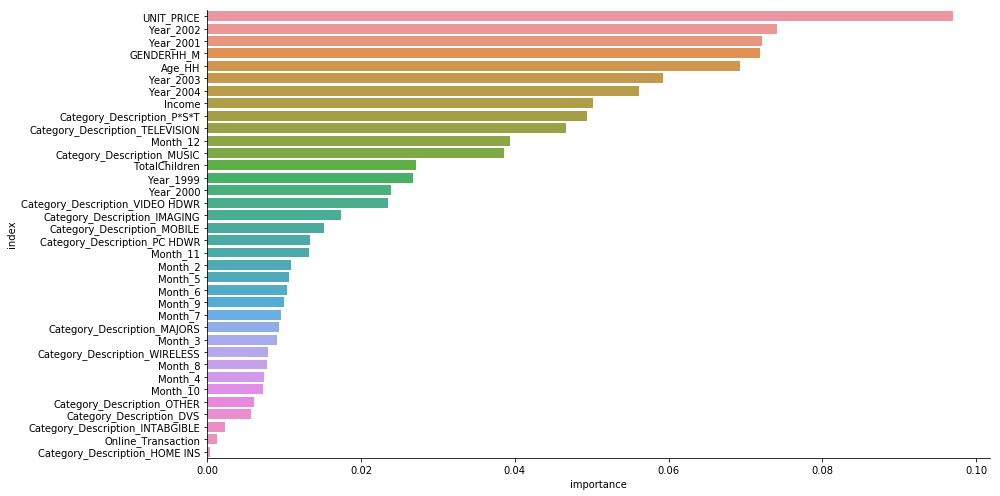

In [51]:
ft=sns.catplot(data=feat,x='importance',y='index',aspect=2,kind='bar',height=7)

### predict on the test set

In [52]:
y_pred = cl.predict(X_test)

### collect scores

#### Confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,y_pred)

array([[28047,   763],
       [ 2712,   468]])

#### Accuracy

In [54]:
1 - (y_pred - Y_test).abs().mean()

0.8913723038449516

#### Precision

In [55]:
import sklearn
sklearn.metrics.precision_score(Y_test,y_pred)

0.380178716490658

#### Recall

In [56]:
sklearn.metrics.recall_score(Y_test,y_pred)

0.1471698113207547

#### AUC score

In [57]:
y_proba = cl.predict_proba(X_test)[:,1]

In [58]:
sklearn.metrics.roc_auc_score(Y_test,y_proba)

0.6392544299127443

In [59]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,y_pred))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94     28810
           1       0.38      0.15      0.21      3180

   micro avg       0.89      0.89      0.89     31990
   macro avg       0.65      0.56      0.58     31990
weighted avg       0.86      0.89      0.87     31990



# Cross-validation

In [60]:
cl

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=2, verbose=0, warm_start=False)

In [61]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10,random_state=0,shuffle=True)
sklearn.model_selection.cross_val_score(cl,X,Y,cv=kf,scoring='roc_auc').mean()

0.961616392000173

In [62]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

clfs = [DecisionTreeClassifier(), sk.ensemble.RandomForestClassifier(n_jobs=-1),
        sk.linear_model.LogisticRegression(n_jobs=-1),sk.tree.DecisionTreeClassifier()]

Let's find the best one in terms of average AUC

In [63]:
#Finding the best Classifier between Decision Tree, Logistic and Random Forest Classifier
maxAUC = -1
bestCL = ''
for cl in clfs:
    kf = KFold(n_splits=10,random_state=2,shuffle=True)
    auc = sklearn.model_selection.cross_val_score(cl,X,Y,cv=kf,scoring='roc_auc').mean()
    if auc > maxAUC:
        bestCl = cl
        maxAUC = auc
print (str(bestCl) + ': ' +str(maxAUC))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=-1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False): 0.9618537960135136


### Q2: Identify the Key Customer Segments using Behavioral Segmentation

#### Cleaning Data

In [64]:
# Filtered purchase dataset only for selected columns
data_pur_fltr=data3[['Household_ID','Transaction_NBR','Final_Date','ORIGINAL_TICKET_NBR','EXTENDED_PRICE','Quantity']]

In [65]:
# Creating a copy for analysis
df = data_pur_fltr.copy()

In [66]:
# Setting a reference date for analysis
Ref_Date = dtm.datetime(2004,11,30)
print(Ref_Date)

2004-11-30 00:00:00


## RFM Analysis

RFM (Recency, Frequency, Monetary) analysis is a behavioral segmentation technique to divide customers based on their past transaction history.

On the basis of how recently, how often and how much did they buy, it helps divide customers into various categories to identify the most profitable customers.

In [67]:
# Calculating 
# - Recency: No. of days passed since the last purchase
# - Frequency: No. of purchases made in the period of relationship with the brand
# - Monetary: Total purchase amount for a household in the period of relationship

RFM = df.groupby(['Household_ID']).agg({'Final_Date': lambda date: (Ref_Date - date.max()).days,
                                        'ORIGINAL_TICKET_NBR': lambda num: num.nunique(),
                                        'EXTENDED_PRICE': lambda price: price.sum(),
                                        'Quantity': lambda quant: quant.sum()})

In [68]:
# Change the name of columns
RFM.columns=['Recency','Frequency', 'Monetary','Quantity']

In [69]:
RFM.head()

,Recency,Frequency,Monetary,Quantity
Household_ID,,,,
100003544,543,1.0,99.97,1
100012312,1421,1.0,29.98,2
100016237,1408,1.0,89.99,1
100022945,1060,3.0,628.91,9
100022976,715,2.0,849.98,2


#### Removing Negative Monetary Values

In [70]:
RFM_OLD=RFM.copy()

In [71]:
RFM=RFM[RFM.Monetary>0]

<b>RFM Score</b>: Based on the values of factors - Recency, Frequency, and Monetary, we calculated scores namely Recency_Score, Frequency_Score & Monetary_Score, for each household. The final RFM score will help us identify households that are our most profitable customers. Customers having lowest recency and highest monetary and frequency values are considered as top customers.

<ul>
    <li>Recency: Customers with the <b>lowest</b> recency are assigned a score 1.</li>
    <li>Frequency: Customers with the <b>highest</b> frequency are assigned a score of 1.</li>
    <li>Monetary: Customers with the <b>highest</b> monetary value are assigned a score of 1.</li>
</ul>

### Generating Quantile Scores (Normalization)

In [72]:
RFM['Recency_Score'] = pd.qcut(RFM['Recency'], 4, ['1','2','3','4'], duplicates='drop')

In [73]:
RFM['Frequency_Score'] = pd.qcut(RFM['Frequency'].rank(method='first'), 4, ['4','3','2','1'], duplicates='drop')

In [74]:
RFM['Monetary_Score'] = pd.qcut(RFM['Monetary'], 4, ['4','3','2','1'], duplicates='drop')

In [75]:
RFM.head(20)

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score
Household_ID,,,,,,,
100003544,543,1.0,99.97,1,2,4,4
100012312,1421,1.0,29.98,2,4,4,4
100016237,1408,1.0,89.99,1,4,4,4
100022945,1060,3.0,628.91,9,3,1,2
100022976,715,2.0,849.98,2,2,2,2
100024091,1053,1.0,3002.97,6,3,4,1
100024909,903,3.0,3030.78,22,2,1,1
100025614,1942,1.0,114.98,2,4,4,4
100025901,224,10.0,5504.71,17,1,1,1


In [76]:
# RFM Final Score
RFM['RFM_Class'] = RFM.Recency_Score.astype(str)+ RFM.Frequency_Score.astype(str) + RFM.Monetary_Score.astype(str)

In [77]:
RFM.head(10)

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,RFM_Class
Household_ID,,,,,,,,
100003544,543,1.0,99.97,1,2,4,4,244
100012312,1421,1.0,29.98,2,4,4,4,444
100016237,1408,1.0,89.99,1,4,4,4,444
100022945,1060,3.0,628.91,9,3,1,2,312
100022976,715,2.0,849.98,2,2,2,2,222
100024091,1053,1.0,3002.97,6,3,4,1,341
100024909,903,3.0,3030.78,22,2,1,1,211
100025614,1942,1.0,114.98,2,4,4,4,444
100025901,224,10.0,5504.71,17,1,1,1,111


## Clustering (K-Means) 

In [78]:
RFM['Recency_Score'] = pd.to_numeric(RFM['Recency_Score'])
RFM['Frequency_Score'] = pd.to_numeric(RFM['Frequency_Score'])
RFM['Monetary_Score'] = pd.to_numeric(RFM['Monetary_Score'])

In [79]:
RFM_Cluster = RFM[['Recency_Score', 'Frequency_Score', 'Monetary_Score']]

### Finding the optimal K

### Elbow Plot

In [80]:
from scipy.spatial.distance import cdist

In [81]:
from sklearn.cluster import KMeans

In [82]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(RFM_Cluster)
    kmeanModel.fit(RFM_Cluster)
    distortions.append(sum(np.min(cdist(RFM_Cluster, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / RFM_Cluster.shape[0])



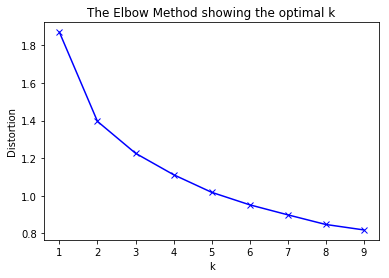

In [83]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

When K increases, the centroids are closer to the clusters centroids.

The improvements will decline, at some point rapidly, creating the elbow shape.

That point is the optimal value for K. In the image above, K=6.

### Silhouette score

In [84]:
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from sklearn.cluster import AgglomerativeClustering

bestSil = -1
for k in range(2,10):
    clus = [KMeans(n_clusters=k,n_jobs=-1), Birch(n_clusters=k), 
            AgglomerativeClustering(n_clusters=k)]
    for cl in clus:
        res = cl.fit(RFM_Cluster)
        sil = metrics.silhouette_score(RFM_Cluster, res.labels_)
        print (str(cl)[:10] + ' with k =' +str(k) + ": " + str(round(sil,4)))
        if (sil > bestSil):
            bestSil = sil
            bestCl = cl

KMeans(alg with k =2: 0.3702
Birch(bran with k =2: 0.3037
Agglomerat with k =2: 0.292
KMeans(alg with k =3: 0.3504
Birch(bran with k =3: 0.2613
Agglomerat with k =3: 0.2846
KMeans(alg with k =4: 0.3547
Birch(bran with k =4: 0.2421
Agglomerat with k =4: 0.2864
KMeans(alg with k =5: 0.3663
Birch(bran with k =5: 0.2742
Agglomerat with k =5: 0.3472
KMeans(alg with k =6: 0.3748
Birch(bran with k =6: 0.2773
Agglomerat with k =6: 0.3395
KMeans(alg with k =7: 0.3643
Birch(bran with k =7: 0.3095
Agglomerat with k =7: 0.3554
KMeans(alg with k =8: 0.3704
Birch(bran with k =8: 0.3044
Agglomerat with k =8: 0.3727
KMeans(alg with k =9: 0.3787
Birch(bran with k =9: 0.3225
Agglomerat with k =9: 0.3767


### Using k-means to find 5 Clusters

In [85]:
from sklearn.cluster import KMeans
#RFM_Cluster.sample(random_state=0,n=4)
clu = KMeans(n_clusters=5,random_state=0)
clu.fit(RFM_Cluster)
RFM_Cluster = RFM_Cluster.copy()
RFM['Cluster'] = clu.labels_

In [86]:
RFM.groupby('Cluster').mean()

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score
Cluster,,,,,,,
0,498.319797,1.048541,654.839775,6.528871,1.509201,3.406409,2.712246
1,1132.506550,1.790393,417.314312,4.157205,2.939956,1.608352,2.981987
2,1410.375196,1.007825,171.578697,2.078834,3.581182,3.346831,3.638693
3,395.816759,3.350645,1956.067011,14.567587,1.414365,1.401105,1.483057
4,1258.895197,1.036125,1517.477829,6.497420,3.213974,3.313617,1.424375


## Analysis

As we can see from the clusters, 
<li>In cluster 0, customers have bought recently, purchased frequently and also have highest monetary value. These are the <b>Loyal high value customers</b>. </li>
<li>In cluster 3, customers have bought recently, purchased only once but have high monetary value. These are <b>Infrequent high value customers</b>. </li>
<li>In cluster 4, customers havent shopped since a long time, but made high value purchases in the past. These are <b>churned customers</b>.</li>
<li>In clusters 1 and 2, low value, infrequent customers who made a transaction long time back.</li>
    <li>Clusters of interest are: 
    <li><b>0-Loyal High Value</b></li>
    <li><b>3-Infrequent High Value</b></li>
    <li><b>4-Churned High Value</b></li>

### Using k-means to find 6 Clusters

In [87]:
from sklearn.cluster import KMeans
#RFM_Cluster.sample(random_state=0,n=4)
clu = KMeans(n_clusters=6,random_state=0)
clu.fit(RFM_Cluster)
RFM_Cluster = RFM_Cluster.copy()
RFM['Cluster'] = clu.labels_## Analysis

In [88]:
RFM.groupby('Cluster').mean()

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score
Cluster,,,,,,,
0,460.132339,1.000000,1689.133292,11.666506,1.490375,3.503850,1.494706
1,1391.714131,1.000000,179.075199,2.124376,3.535272,3.494465,3.599088
2,592.420583,1.269515,226.069546,3.809709,1.662136,2.801553,3.439612
3,426.988182,3.429273,1811.898622,13.734364,1.473091,1.293455,1.604909
4,1381.114690,1.044412,1326.717672,5.388482,3.492435,3.272328,1.521718
5,1362.087353,1.586050,428.012060,3.744133,3.484355,1.721317,3.007823


### Analysis: Based on Recency_Score, Frequency_Score, Monetary_Score

As we can see from the clusters, 
<li>In cluster 3, customers have bought recently, purchased frequently and also have highest monetary value. These are the <b>loyal high value customers</b>. </li>
<li>In cluster 0, customers havent shopped since a long time, but made frequent high value purchases in the past. These are <b>Infrequent High Value</b>.</li>
<li>In cluster 4, customers havent shopped since a long time, but made high value purchases in the past. These are <b>Churned high value customers</b>.</li>
<li>In cluster 2, customers have bought recently and a few times but have low monetary value. These are <b>Frequent low value customers</b>. </li>
<li>In clusters 1 and 5, low value and either infrequent or havent made transaction since long time.</li>
    <li>Clusters of interest are: 
    <li><b>3-Loyal High Value</b></li>
    <li><b>0-Infrequent High Value</b></li>
    <li><b>4-Churned High Value</b></li>
    <li><b>2-Infrequent Low Value</b></li>

### Demographic Means of Clusters

In [89]:
datademo=data3.copy()

In [90]:
datademo.GENDERHH.value_counts()

M    96659
F    48373
U    27713
Name: GENDERHH, dtype: int64

In [91]:
datademo['Bin_GENDERHH']= ((datademo.GENDERHH == 'M') | (datademo.GENDERHH == 'U'))*1

In [92]:
datademo.Bin_GENDERHH.value_counts()

1    124372
0     48373
Name: Bin_GENDERHH, dtype: int64

In [93]:
Demo = datademo.groupby(['Household_ID']).agg({'Online_Transaction': 'sum',
                                        'Age_HH':'max',
                                        'Income': 'max',
                                        'Bin_GENDERHH': 'max',
                                        'TotalChildren': 'max',
                                        'EXTENDED_PRICE':'sum' })

In [94]:
Demo_Final=Demo[Demo.EXTENDED_PRICE>0]

In [95]:
Demo_Final.head()

,Online_Transaction,Age_HH,Income,Bin_GENDERHH,TotalChildren,EXTENDED_PRICE
Household_ID,,,,,,
100003544,0,28.000000,6.00000,1,0,99.97
100012312,0,24.000000,1.00000,1,0,29.98
100016237,0,48.261417,5.91973,0,0,89.99
100022945,0,44.000000,5.00000,1,1,628.91
100022976,0,54.000000,7.00000,1,0,849.98


In [96]:
RFM.head()

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,RFM_Class,Cluster
Household_ID,,,,,,,,,
100003544,543,1.0,99.97,1,2,4,4,244,2
100012312,1421,1.0,29.98,2,4,4,4,444,1
100016237,1408,1.0,89.99,1,4,4,4,444,1
100022945,1060,3.0,628.91,9,3,1,2,312,5
100022976,715,2.0,849.98,2,2,2,2,222,3


In [97]:
merged =Demo_Final.merge(RFM, on='Household_ID')

In [98]:
merged.head().T

Household_ID,100003544,100012312,100016237,100022945,100022976
Online_Transaction,0,0,0,0,0
Age_HH,28,24,48.2614,44,54
Income,6,1,5.91973,5,7
Bin_GENDERHH,1,1,0,1,1
TotalChildren,0,0,0,1,0
EXTENDED_PRICE,99.97,29.98,89.99,628.91,849.98
Recency,543,1421,1408,1060,715
Frequency,1,1,1,3,2
Monetary,99.97,29.98,89.99,628.91,849.98
Quantity,1,2,1,9,2


In [99]:
merged.groupby('Cluster').size()

Cluster
0    2078
1    4607
2    2575
3    5500
4    2049
5    3068
dtype: int64

### Analysis: Based on Recency_Score, Frequency_Score, Monetary_Score

<li>Clusters of interest are: </li>
<li><b>3-Loyal High Value</b> have high income and highest online transactions</li>
<li><b>0-Infrequent High Value</b> have high income and do not shop online and have comparatively more children </li>
<li><b>4-Churned High Value</b> have slighltly higher income and lowest online transactions</li>
<li><b>2-Infrequent Low Value</b> have moderate income and also have children and also shop online </li>

In [100]:
merged.Online_Transaction.unique()

array([  0,   4,   2,  10,   3,   1,   5,   8,   6,   7,  29,   9,  12,
        34,  43,  15,  20, 107,  11,  58,  19,  21,  17,  56,  25])

In [101]:
highvalue=merged[(merged.Cluster==3) | (merged.Cluster == 0) | (merged.Cluster == 4)]

In [102]:
def num2clus(desc):
    if desc==3:
        return 'Loyal High Value'
    elif desc==0:
        return 'Infrequent High Value'
    elif desc==4:
        return 'Churned High Value'

In [103]:
highvalue['Cluster_Type'] = highvalue['Cluster'].apply(num2clus)  # Apply is fast on Series but v slow on Data Frames 

In [104]:
highvalue.head()

,Online_Transaction,Age_HH,Income,Bin_GENDERHH,TotalChildren,EXTENDED_PRICE,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,RFM_Class,Cluster,Cluster_Type
Household_ID,,,,,,,,,,,,,,,,
100022976,0,54.0,7.0,1,0,849.98,715,2.0,849.98,2,2,2,2,222,3,Loyal High Value
100024091,0,44.0,5.0,1,0,3002.97,1053,1.0,3002.97,6,3,4,1,341,4,Churned High Value
100024909,0,56.0,7.0,1,0,3030.78,903,3.0,3030.78,22,2,1,1,211,3,Loyal High Value
100025901,0,72.0,7.0,1,0,5504.71,224,10.0,5504.71,17,1,1,1,111,3,Loyal High Value
100026342,0,48.0,9.0,0,3,2208.83,394,1.0,2208.83,18,1,4,1,141,0,Infrequent High Value


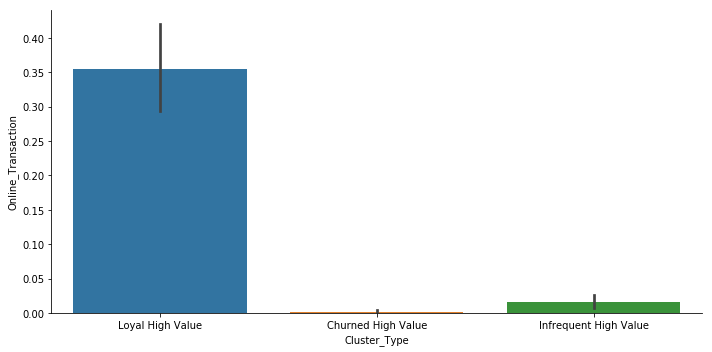

In [105]:
import seaborn as sns
sns.catplot(x='Cluster_Type',y='Online_Transaction',data=highvalue,kind='bar',aspect = 2)

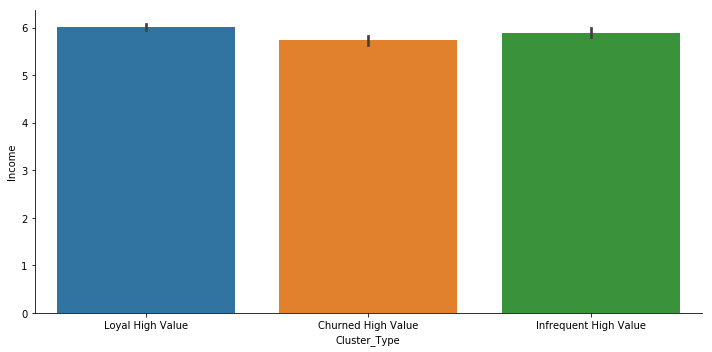

In [106]:
import seaborn as sns
sns.catplot(x='Cluster_Type',y='Income',data=highvalue,kind='bar',aspect = 2)

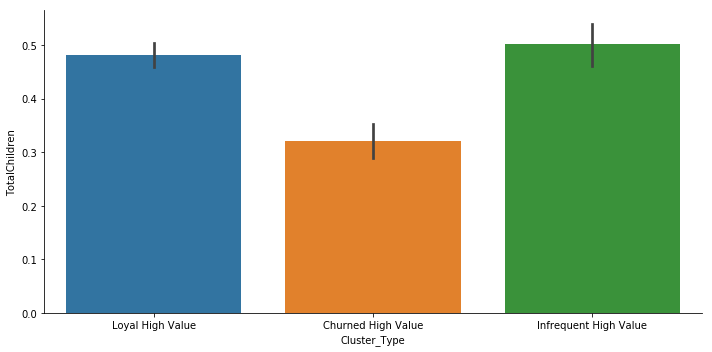

In [107]:
import seaborn as sns
sns.catplot(x='Cluster_Type',y='TotalChildren',data=highvalue,kind='bar',aspect = 2)

## CUSTOMER LIFETIME VALUE

Customer Lifetime Value is a monetary value that represents the amount of revenue that a customer will give the company over the period of the relationship.

<b>CLV</b> = ((Average Order Value x Purchase Frequency)/Churn Rate) x Profit margin

Average Order Value(AOV): The Average Order value is the ratio of your total revenue and the total number of orders. AOV represents the mean amount of revenue that the customer spends on an order.

<B>Average Order Value</B> = Total Revenue / Total Number of Orders

In [108]:
RFM['Avg_Order_Value']=RFM['Monetary']/RFM['Frequency']
RFM.head()

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,RFM_Class,Cluster,Avg_Order_Value
Household_ID,,,,,,,,,,
100003544,543,1.0,99.97,1,2,4,4,244,2,99.970000
100012312,1421,1.0,29.98,2,4,4,4,444,1,29.980000
100016237,1408,1.0,89.99,1,4,4,4,444,1,89.990000
100022945,1060,3.0,628.91,9,3,1,2,312,5,209.636667
100022976,715,2.0,849.98,2,2,2,2,222,3,424.990000


Purchase Frequency(PF): Purchase Frequency is the ratio of the total number of orders upon the total number of customer. It represents the average number of orders placed by each customer.

<B>Purchase Frequency</B> =  Total Number of Orders / Total Number of Customers

In [109]:
Purchase_Frequency=sum(RFM['Frequency'])/RFM.shape[0]
Purchase_Frequency

1.8021331186798812

Repeat Rate: Repeat rate can be defined as the ratio of the number of customers with more than one order to the number of unique customers.

<B>Repeat Rate</B> = Number of Customers with more than one order/ Number of Unique Customers

In [110]:
# Repeat Rate
Repeat_Rate=RFM[RFM.Frequency > 1].shape[0]/RFM.shape[0]
Repeat_Rate

0.32177894048397643

Churn Rate: Churn Rate is the percentage of customers who have not ordered again.

<B>Churn Rate</B> = 1-Repeat Rate

In [111]:
# Churn Rate
Churn_Rate=1-Repeat_Rate
Churn_Rate

0.6782210595160236

Let's assume the business is earning approximately 5% profit on the total sale.

In [112]:
# Profit Margin
RFM['Profit_Margin']=RFM['Monetary']*0.05

In [113]:
RFM.head()

,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,RFM_Class,Cluster,Avg_Order_Value,Profit_Margin
Household_ID,,,,,,,,,,,
100003544,543,1.0,99.97,1,2,4,4,244,2,99.970000,4.9985
100012312,1421,1.0,29.98,2,4,4,4,444,1,29.980000,1.4990
100016237,1408,1.0,89.99,1,4,4,4,444,1,89.990000,4.4995
100022945,1060,3.0,628.91,9,3,1,2,312,5,209.636667,31.4455
100022976,715,2.0,849.98,2,2,2,2,222,3,424.990000,42.4990


Customer Lifetime: Customer Lifetime is the period of time that the customer has been continuously ordering.

<B>Customer Lifetime</B> = 1/Churn Rate

<b>Customer Value</b> = Average Order Value * Purchase Frequency

In [114]:
# Customer Lifetime Value
RFM['CLV']=(RFM['Avg_Order_Value']*Purchase_Frequency)/Churn_Rate*RFM['Profit_Margin']

In [115]:
df1 = RFM.groupby('Cluster').mean().reset_index()
df1

,Cluster,Recency,Frequency,Monetary,Quantity,Recency_Score,Frequency_Score,Monetary_Score,Avg_Order_Value,Profit_Margin,CLV
0,0,460.132339,1.000000,1689.133292,11.666506,1.490375,3.503850,1.494706,1689.133292,84.456665,647042.954036
1,1,1391.714131,1.000000,179.075199,2.124376,3.535272,3.494465,3.599088,179.075199,8.953760,5878.368910
2,2,592.420583,1.269515,226.069546,3.809709,1.662136,2.801553,3.439612,202.554594,11.303477,7833.234255
3,3,426.988182,3.429273,1811.898622,13.734364,1.473091,1.293455,1.604909,788.066436,90.594931,344641.387653
4,4,1381.114690,1.044412,1326.717672,5.388482,3.492435,3.272328,1.521718,1278.363609,66.335884,315400.233991
5,5,1362.087353,1.586050,428.012060,3.744133,3.484355,1.721317,3.007823,276.856027,21.400603,28354.050683


## Plotting CLV vs Customer Segments

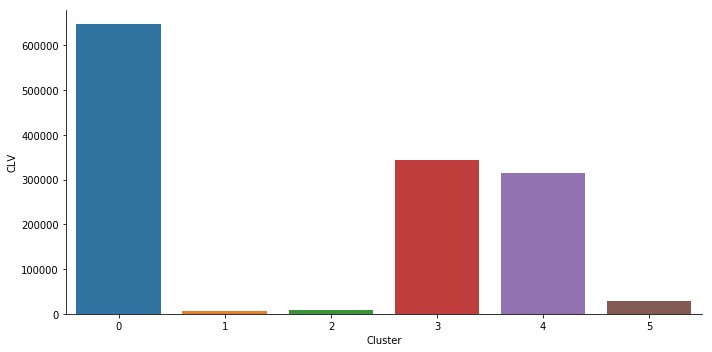

In [116]:
import seaborn as sns

sns.catplot(x='Cluster',y='CLV',data=df1,kind='bar',aspect = 2)

## Analysis

As we can see from the graph,
Cluster 0 and 3 have the highest CLV which are also the high value clusters in RFM.